Dependencias necesarias para el modelo:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

Funciones que se van a reutilizar en el script:

In [54]:
def run_model(X_train, X_test, y_train, y_test, balanced=False):
    if balanced:
      model = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    else:
      model = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    model.fit(X_train, y_train)
    return model

def show_results(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

Revisión del dataset:

(9841, 51)
FLAG
0    7662
1    2179
Name: count, dtype: int64


Text(0, 0.5, 'Number of Observations')

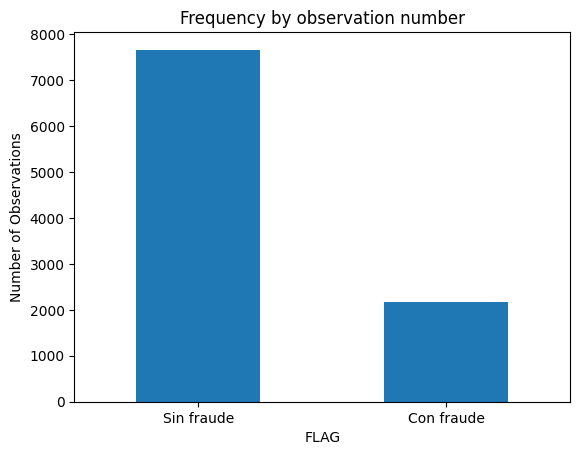

In [ ]:
df = pd.read_csv("../../datasets/transaction_dataset_clean.csv")

print(df.shape) # cuantas filas y columnas tiene el dataset

# analizamos las clases en FLAG
count_classes = pd.Series(df['FLAG']).value_counts()
print(count_classes)
count_classes.plot(kind = 'bar', rot=0)
LABELS = ["Sin fraude", "Con fraude"]
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("FLAG")
plt.ylabel("Number of Observations")

Preparación del dataset y entrenamiento del modelo base:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.1238795680745014. Increase the number of iterations.
  warnings.warn(


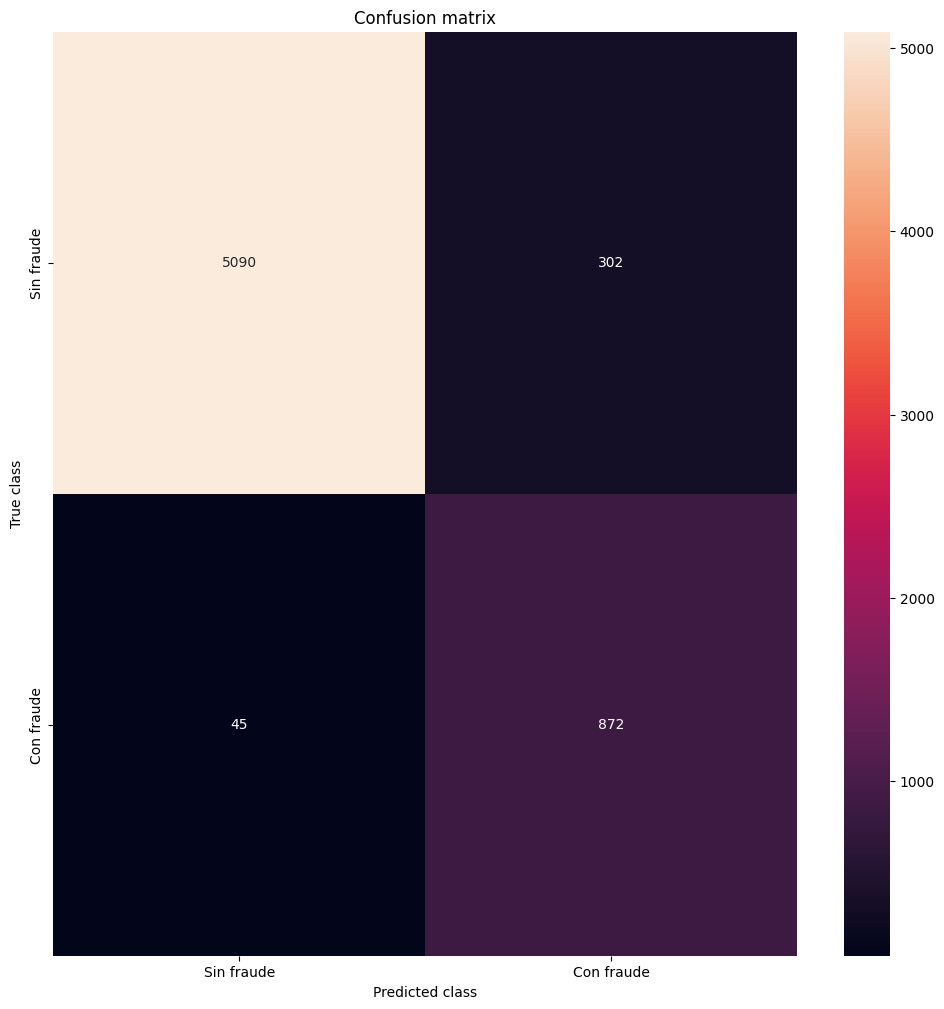

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      5392
           1       0.74      0.95      0.83       917

    accuracy                           0.94      6309
   macro avg       0.87      0.95      0.90      6309
weighted avg       0.96      0.94      0.95      6309



In [58]:
# se definen etiquetas y features
x = pd.get_dummies(df.drop('FLAG', axis=1))
y = df['FLAG']

# se unen las features y las etiquetas para eliminar las filas con nulos de manera consistente.
# Así aseguramos que x e y tengan el mismo número de filas después de la eliminación de nulos.
xy = pd.concat([x, y], axis=1)
xy = xy.dropna()

# se separan las features y etiquetas después de la limpieza
x = xy.drop('FLAG', axis=1)
y = xy['FLAG']

# se divide en dataframe en sets de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

# entrenamiento, ejecución y análisis del modelo
model = run_model(x_train, x_test, y_train, y_test)
pred_y = model.predict(x_test)
show_results(y_test, pred_y)

Estratega de Compensación por Penalización:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.10668787268357009. Increase the number of iterations.
  warnings.warn(


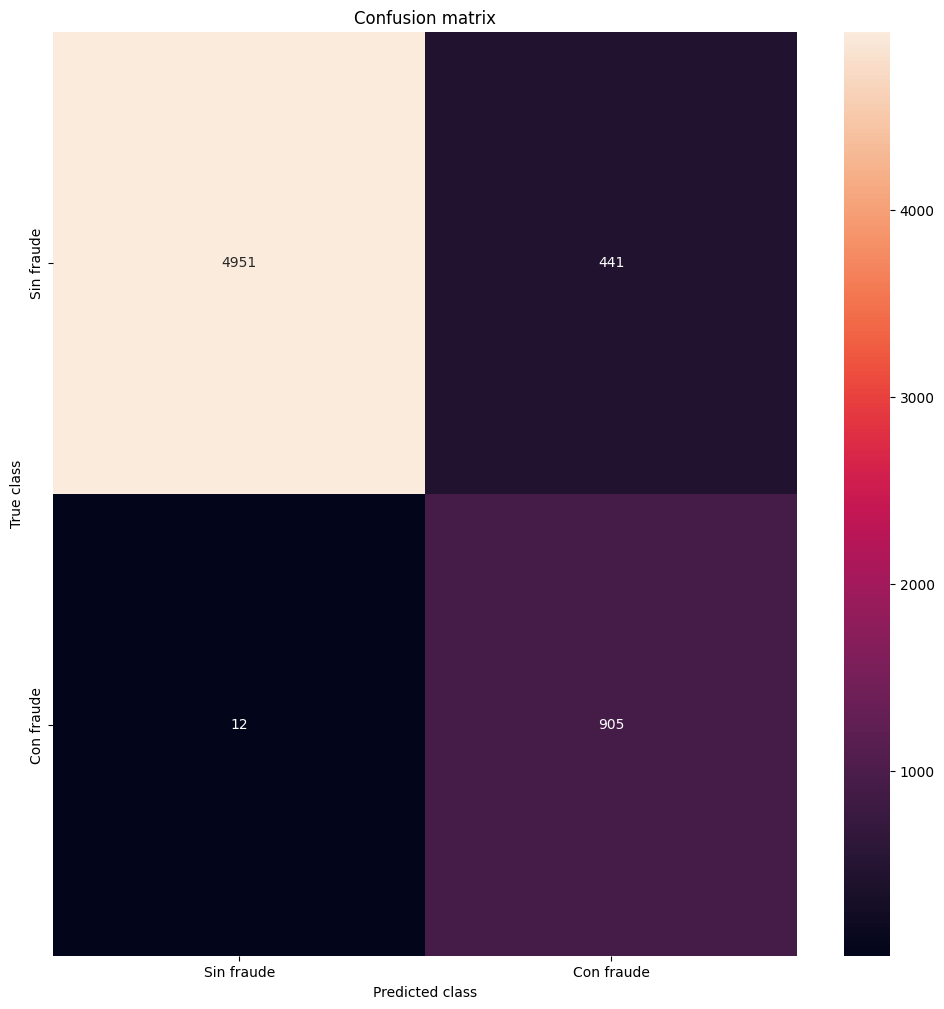

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5392
           1       0.67      0.99      0.80       917

    accuracy                           0.93      6309
   macro avg       0.83      0.95      0.88      6309
weighted avg       0.95      0.93      0.93      6309



In [59]:
model = run_model(x_train, x_test, y_train, y_test, True)
pred_y = model.predict(x_test)
show_results(y_test, pred_y)

Estrategia de Under-Sampling:

Distribución pre under-sampling Counter({0: 2270, 1: 433})
Distribución post under-sampling Counter({0: 2270, 1: 433})


/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.023689290236718955. Increase the number of iterations.
  warnings.warn(


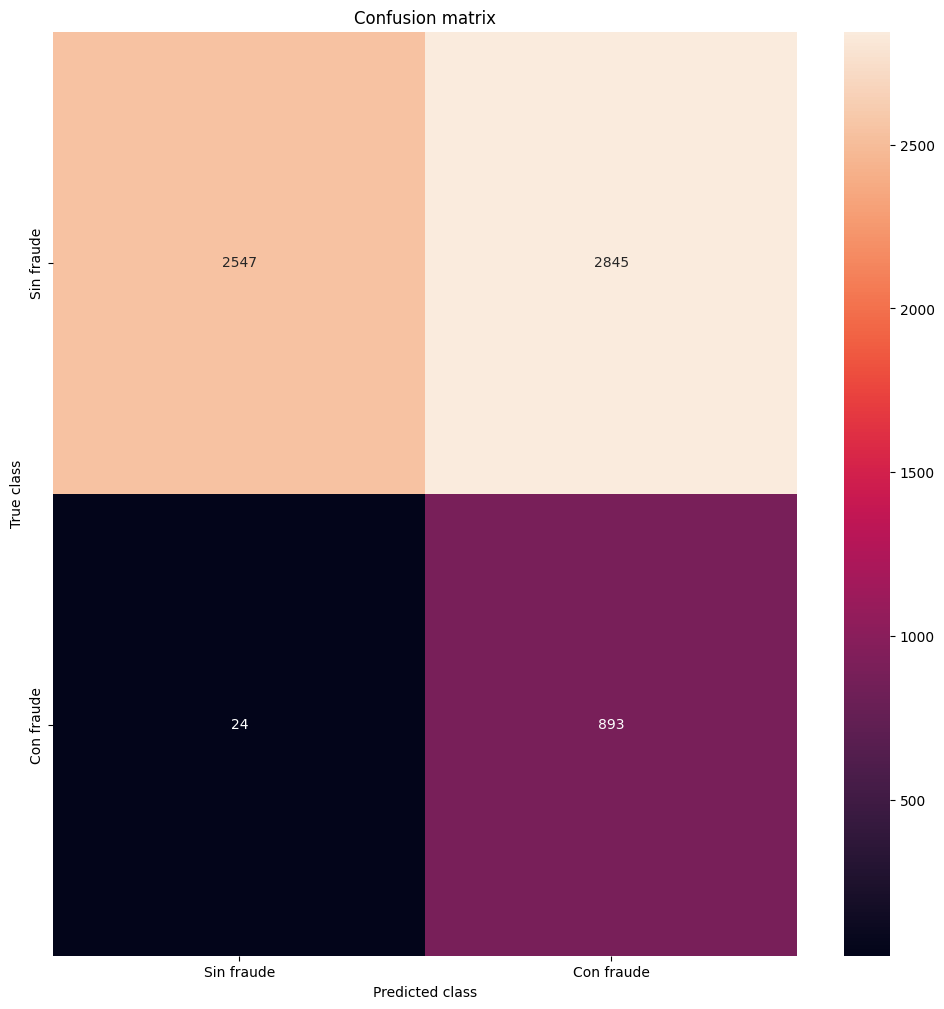

              precision    recall  f1-score   support

           0       0.99      0.47      0.64      5392
           1       0.24      0.97      0.38       917

    accuracy                           0.55      6309
   macro avg       0.61      0.72      0.51      6309
weighted avg       0.88      0.55      0.60      6309



In [60]:
nm = NearMiss()
print ("Distribución pre under-sampling {}".format(Counter(y_train)))
x_train_nm, y_train_nm = nm.fit_resample(x_train, y_train)
print ("Distribución post under-sampling {}".format(Counter(y_train)))
model = run_model(x_train_nm, x_test, y_train_nm, y_test, False)
pred_y = model.predict(x_test)
show_results(y_test, pred_y)

Estrategia de Over-Sampling:

Distribución pre over-sampling Counter({0: 2270, 1: 433})
Distribución post over-sampling Counter({0: 2270, 1: 433})


/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.10353652745609472. Increase the number of iterations.
  warnings.warn(


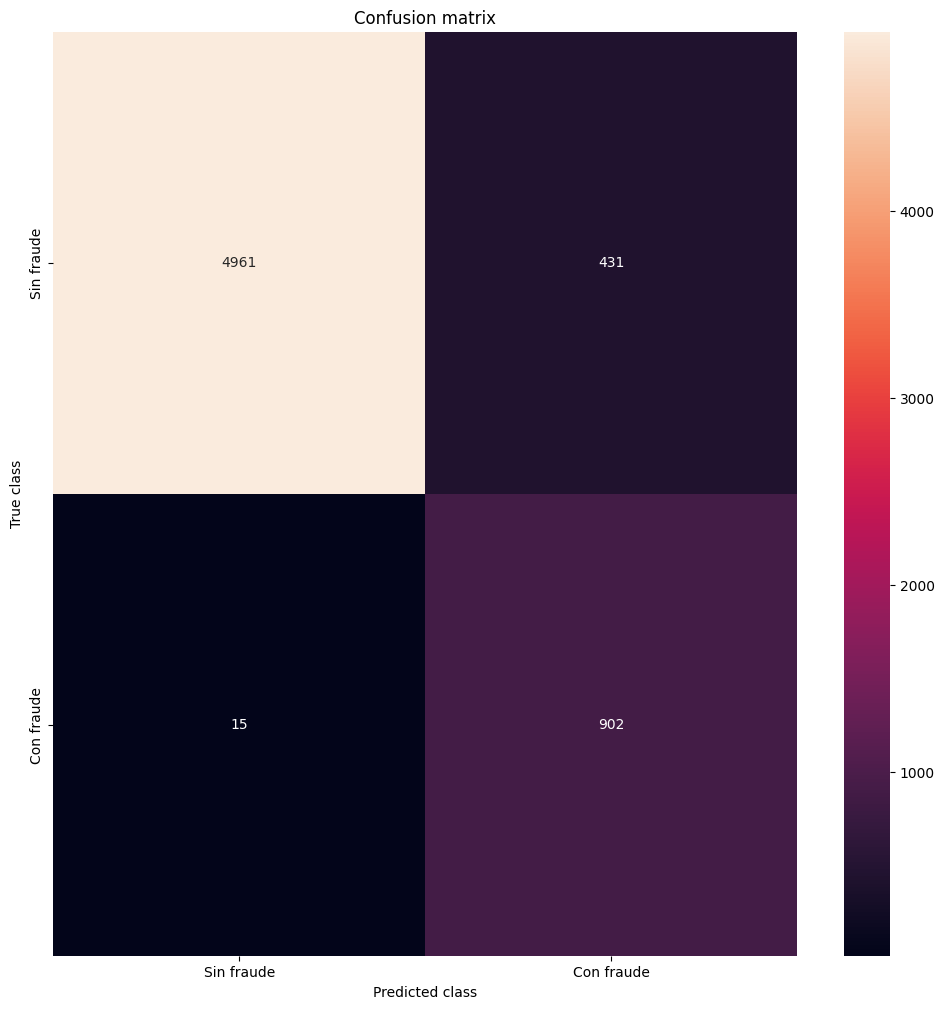

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5392
           1       0.68      0.98      0.80       917

    accuracy                           0.93      6309
   macro avg       0.84      0.95      0.88      6309
weighted avg       0.95      0.93      0.93      6309



In [61]:
os = RandomOverSampler()
print ("Distribución pre over-sampling {}".format(Counter(y_train)))
x_train_os, y_train_os = os.fit_resample(x_train, y_train)
print ("Distribución post over-sampling {}".format(Counter(y_train)))
model = run_model(x_train_os, x_test, y_train_os, y_test)
pred_y = model.predict(x_test)
show_results(y_test, pred_y)

Estrategia de Combinación SMOTE - Tomek:

Distribución pre smote-tomek Counter({0: 2270, 1: 433})
Distribución post smote-tomek Counter({0: 2270, 1: 433})


/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.10355425171488418. Increase the number of iterations.
  warnings.warn(


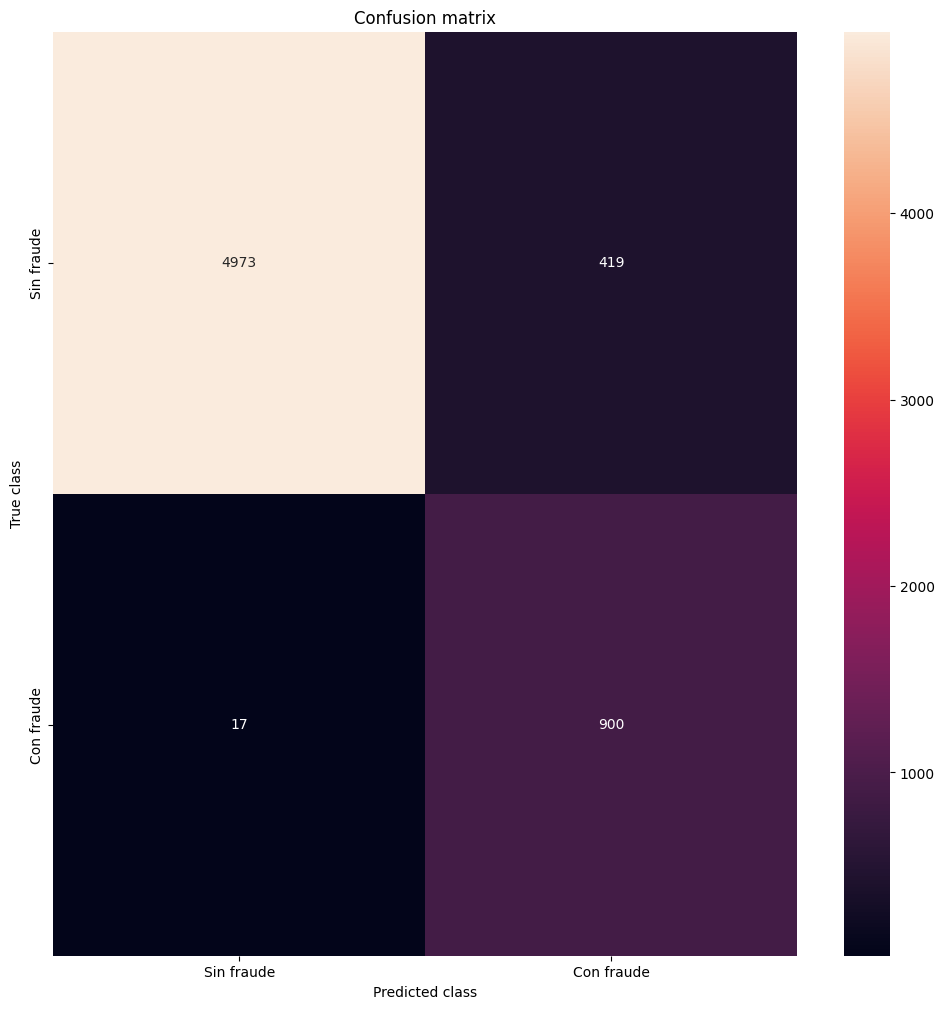

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5392
           1       0.68      0.98      0.81       917

    accuracy                           0.93      6309
   macro avg       0.84      0.95      0.88      6309
weighted avg       0.95      0.93      0.94      6309



In [62]:
st = SMOTETomek()
print ("Distribución pre smote-tomek {}".format(Counter(y_train)))
x_train_st, y_train_st = st.fit_resample(x_train, y_train)
print ("Distribución post smote-tomek {}".format(Counter(y_train)))
model = run_model(x_train_st, x_test, y_train_st, y_test)
pred_y = model.predict(x_test)
show_results(y_test, pred_y)

Estrategia de Ensamble de modelos con Balanceo:

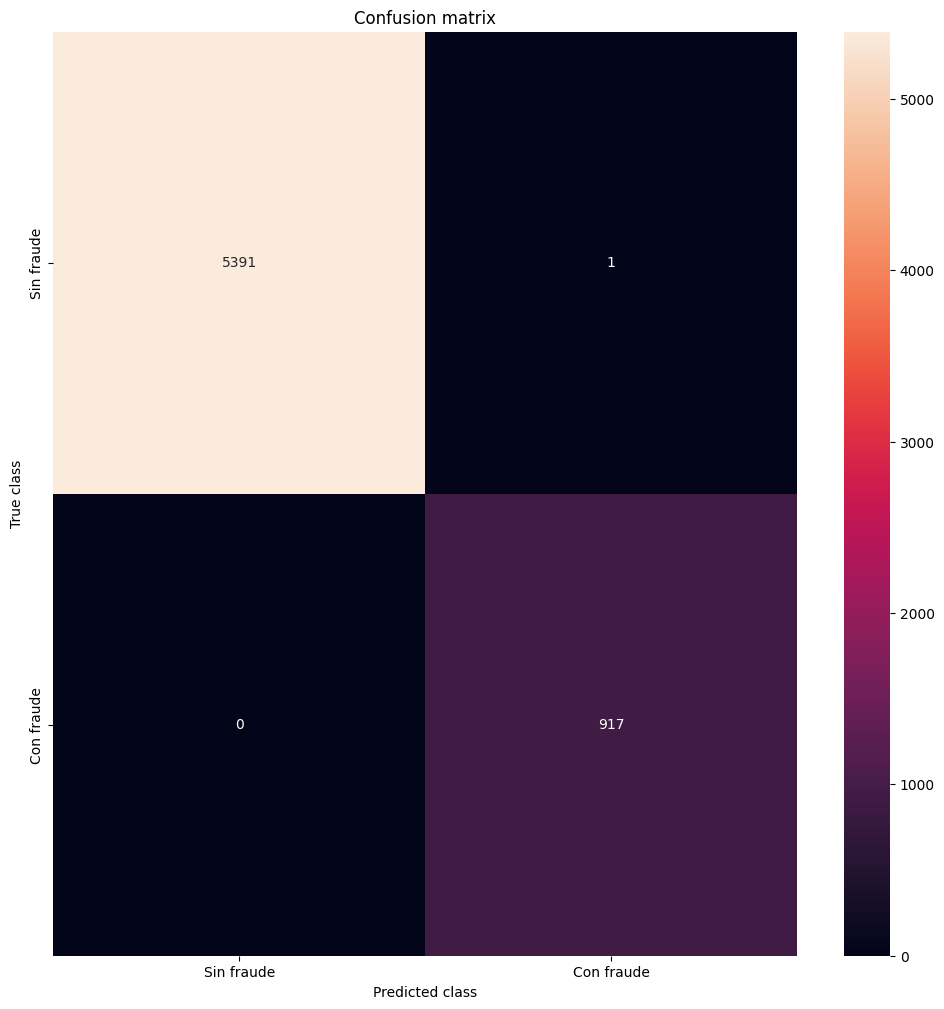

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5392
           1       1.00      1.00      1.00       917

    accuracy                           1.00      6309
   macro avg       1.00      1.00      1.00      6309
weighted avg       1.00      1.00      1.00      6309



In [63]:
bbc = BalancedBaggingClassifier(random_state=42)
bbc.fit(x_train, y_train)
pred_y = bbc.predict(x_test)
show_results(y_test, pred_y)